In [59]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

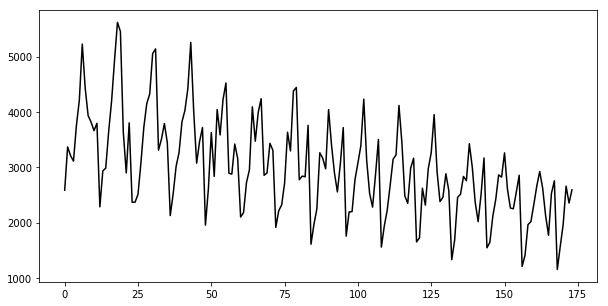

In [60]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

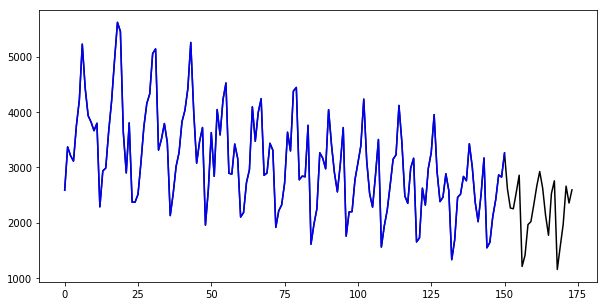

In [61]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

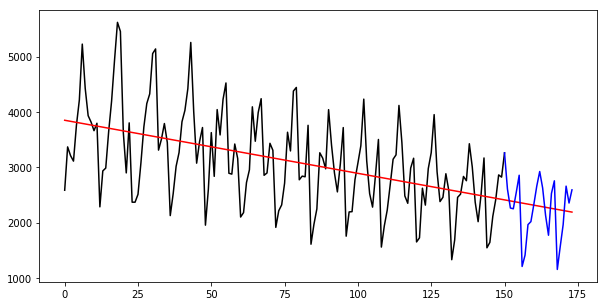

In [62]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()


[3849.23884629   -9.58949808]


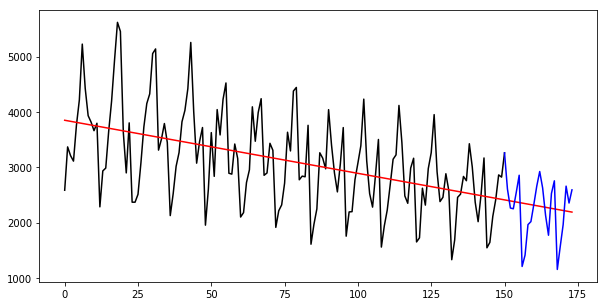

In [63]:
import statsmodels.api as sm
x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_)
res = smm.fit() # строим модель регрессии
print(res.params)
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # строим прогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

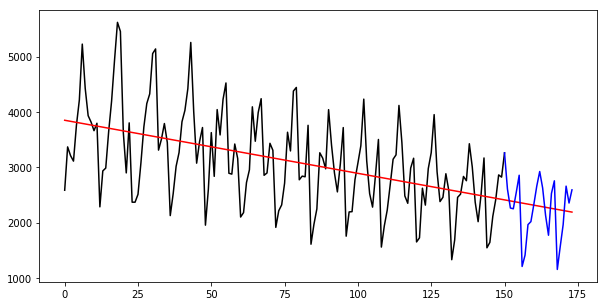

In [64]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1)
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

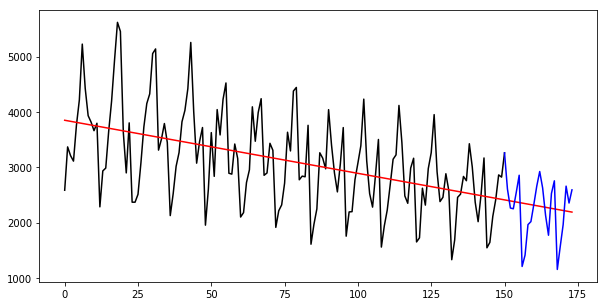

In [65]:
def func(t, b0, b1):
    return b0 + b1 * t
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

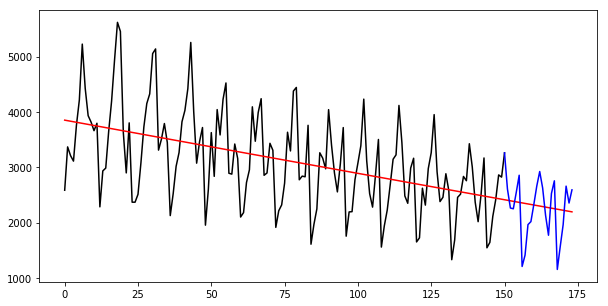

In [8]:
#2 stepeni
def func(t, b0, b1, b2):
    return b0 + b1 * t + (b2)*(t**2)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, (t0*t0*popt[2])+t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

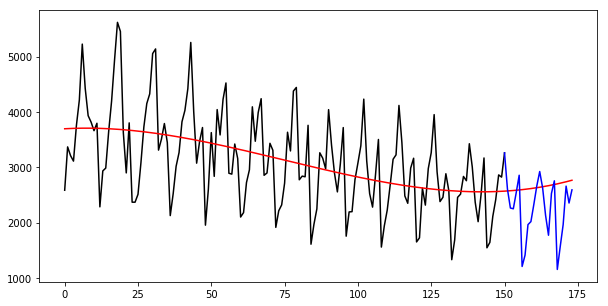

In [9]:
#3 stepeni
def func(t, b0, b1, b2, b3):
    return b0 + b1 * t + (b2)*(t**2) + b3*(t**3)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, (t0*t0*t0*popt[3])+(t0*t0*popt[2])+t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

In [66]:

from sklearn.metrics import mean_squared_error 
reg = LinearRegression().fit(t, Z)
Z = Fort[:len(Fort)-24+1]
t0=np.arange(0, len(Fort), 1)
t0=t0.reshape(-1,1)


In [67]:
def me(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = differences.mean()
    return mean_of_differences

In [68]:
me(reg.predict(t0[-24:]),Fort[-24:])

437.01727779714184

In [69]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

In [70]:
rmse(reg.predict(t0[-24:]),Fort[-24:])

531.284134980843

In [71]:
def mape(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = (differences/predictions)*100 
    mape_val = mean_of_differences.mean() 
    return mape_val

In [72]:
mape(reg.predict(t0[-24:]),Fort[-24:])

19.01230294748658

In [73]:
def k1ns(predictions, targets):
    differences = predictions - targets                       
    differences_squared = differences ** 2   
    differences_sum = differences_squared.sum()
    differences1 = predictions**2
    differences1_sum = differences1.sum() 
    finish = differences_sum / differences1_sum
    k1ns_val = np.sqrt(finish) 
    return k1ns_val

In [74]:
k1ns(reg.predict(t0[-24:]),Fort[-24:])


0.23084331650074877

In [75]:
def k2ns(predictions, targets):
    differences = predictions - targets                       
    differences_squared = differences ** 2   
    differences_sum = differences_squared.sum()
    differences1 = ((targets.mean())-predictions)**2
    differences1_sum = differences1.sum() 
    finish = differences_sum / differences1_sum
    k2ns_val = np.sqrt(finish) 
    return k2ns_val



In [76]:
k2ns(reg.predict(t0[-24:]),Fort[-24:])

7.125682177136361

In [118]:

t23=t0.reshape(-1,1)
t23=reg.predict(t0[-24:])
print(t23[0])
t23


[2410.81413384]


array([[2410.81413384],
       [2401.22463576],
       [2391.63513768],
       [2382.0456396 ],
       [2372.45614151],
       [2362.86664343],
       [2353.27714535],
       [2343.68764726],
       [2334.09814918],
       [2324.5086511 ],
       [2314.91915301],
       [2305.32965493],
       [2295.74015685],
       [2286.15065877],
       [2276.56116068],
       [2266.9716626 ],
       [2257.38216452],
       [2247.79266643],
       [2238.20316835],
       [2228.61367027],
       [2219.02417219],
       [2209.4346741 ],
       [2199.84517602],
       [2190.25567794]])

In [111]:
# исходный вр считаем от 150 точек для того чтобы S посчитать
# predict_1 = reg.predict(t0[-23])
#def func_delta(predictions, targets, predict_1, predictions_start, targets_end ):
    #differences = predict_1 - predictions.mean()     
    #differences_squared = differences ** 2   
    #differences1 = (predictions - predictions.mean())**2
    #differences1_sum = differences1.sum() 
    #finish = differences_squared / differences1_sum + 1 + 1/24
    #ostatok1 = (((targets_end - predictions_start) ** 2).sum())/148
    #S = np.sqrt(ostatok1) 
    #k1ns_val = np.sqrt(finish) * 1.96 *S
    #return k1ns_val


In [119]:
def func_delta(predictions, targets, predict_1, predictions_start, targets_end ):
    differences = predict_1 - predictions.mean()
    print(differences)
    differences_squared = differences ** 2  
    print(differences_squared)
    differences1 = (predictions - predictions.mean())**2
    print(differences1)
    differences1_sum = differences1.sum() 
    print(differences1_sum)
    finish = differences_squared / differences1_sum + 1 + 1/24
    print(finish)
    ostatok1 = (((targets_end - predictions_start) ** 2).sum())/148
    print(ostatok1)
    S = np.sqrt(ostatok1) 
    print(S)
    k1ns_val = np.sqrt(finish) * 1.96 *S
    return k1ns_val


In [129]:
func_new_hero = func_delta(reg.predict(t0[-24:]),Fort[-24:], t23[0], reg.predict(t0[:150]), Fort[:150] )
func_new_hero 

[110.27922795]
[12161.50811813]
[[12161.50811813]
 [10138.4217015 ]
 [ 8299.25223184]
 [ 6643.99970915]
 [ 5172.66413342]
 [ 3885.24550466]
 [ 2781.74382286]
 [ 1862.15908803]
 [ 1126.49130017]
 [  574.74045927]
 [  206.90656534]
 [   22.98961837]
 [   22.98961837]
 [  206.90656534]
 [  574.74045927]
 [ 1126.49130017]
 [ 1862.15908803]
 [ 2781.74382286]
 [ 3885.24550466]
 [ 5172.66413342]
 [ 6643.99970915]
 [ 8299.25223184]
 [10138.4217015 ]
 [12161.50811813]]
105752.24450546331
[1.15666667]
571008.5352465237
755.6510671245848


array([1592.87421243])

In [134]:
TB = t23 - func_new_hero
TH = t23 + func_new_hero

print(TB)

[[817.93992142]
 [808.35042334]
 [798.76092525]
 [789.17142717]
 [779.58192909]
 [769.992431  ]
 [760.40293292]
 [750.81343484]
 [741.22393675]
 [731.63443867]
 [722.04494059]
 [712.45544251]
 [702.86594442]
 [693.27644634]
 [683.68694826]
 [674.09745017]
 [664.50795209]
 [654.91845401]
 [645.32895592]
 [635.73945784]
 [626.14995976]
 [616.56046168]
 [606.97096359]
 [597.38146551]]


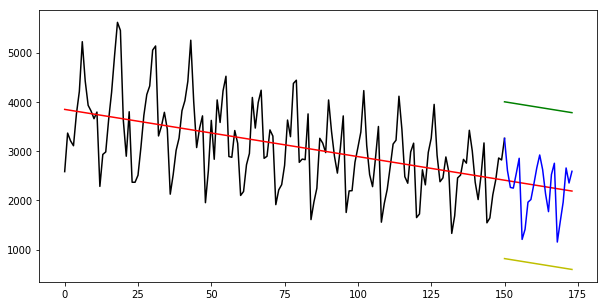

In [135]:


plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.plot(t0[-24:], TH , 'g')
plt.plot(t0[-24:], TB, 'y')
plt.show()

In [137]:
def func_delta2(predictions, targets, predict_1, predictions_start, targets_end ):
    differences = predictions - targets   
    differences_squared = differences ** 2   
    differences_sum = differences_squared.sum() 
    finish = differences_sum / 24
  
    k1ns_val = np.sqrt(finish) * 1.96 
    return k1ns_val

In [138]:
func_new_hero1 = func_delta2(reg.predict(t0[-24:]),Fort[-24:], t23[0], reg.predict(t0[:150]), Fort[:150] )
func_new_hero1
TB10 = t23 - func_new_hero1
TH10 = t23 + func_new_hero1
print(TB10, ',', TH10)

[[1369.49722928]
 [1359.9077312 ]
 [1350.31823312]
 [1340.72873503]
 [1331.13923695]
 [1321.54973887]
 [1311.96024078]
 [1302.3707427 ]
 [1292.78124462]
 [1283.19174654]
 [1273.60224845]
 [1264.01275037]
 [1254.42325229]
 [1244.8337542 ]
 [1235.24425612]
 [1225.65475804]
 [1216.06525995]
 [1206.47576187]
 [1196.88626379]
 [1187.29676571]
 [1177.70726762]
 [1168.11776954]
 [1158.52827146]
 [1148.93877337]] , [[3452.13103841]
 [3442.54154032]
 [3432.95204224]
 [3423.36254416]
 [3413.77304608]
 [3404.18354799]
 [3394.59404991]
 [3385.00455183]
 [3375.41505374]
 [3365.82555566]
 [3356.23605758]
 [3346.64655949]
 [3337.05706141]
 [3327.46756333]
 [3317.87806525]
 [3308.28856716]
 [3298.69906908]
 [3289.109571  ]
 [3279.52007291]
 [3269.93057483]
 [3260.34107675]
 [3250.75157866]
 [3241.16208058]
 [3231.5725825 ]]


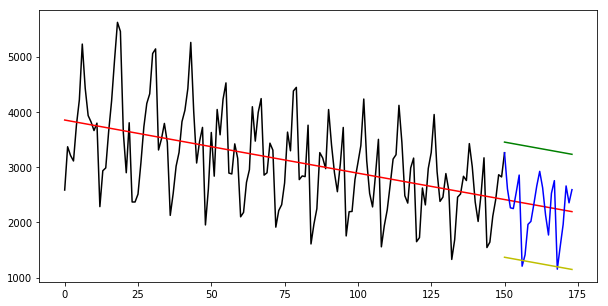

In [139]:

def func(t, b0, b1, b2):
    return b0 + b1 * t + (b2)*(t**2)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, (t0*t0*popt[2])+t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], TH10 , 'g')
plt.plot(t0[-24:], TB10, 'y')
plt.show()

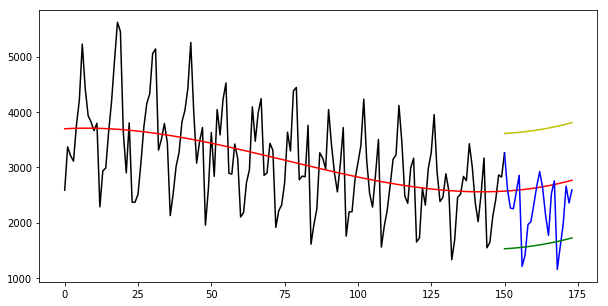

In [145]:

def func(t, b0, b1, b2, b3):
    return b0 + b1 * t + (b2)*(t**2) + b3*(t**3)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, (t0*t0*t0*popt[3])+(t0*t0*popt[2])+t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.plot(t0[-24:], ((t0*t0*t0*popt[3])+(t0*t0*popt[2])+t0*popt[1]+popt[0])[-24:] - func_new_hero1 , 'g')
plt.plot(t0[-24:], ((t0*t0*t0*popt[3])+(t0*t0*popt[2])+t0*popt[1]+popt[0])[-24:] + func_new_hero1 , 'y')
plt.show()

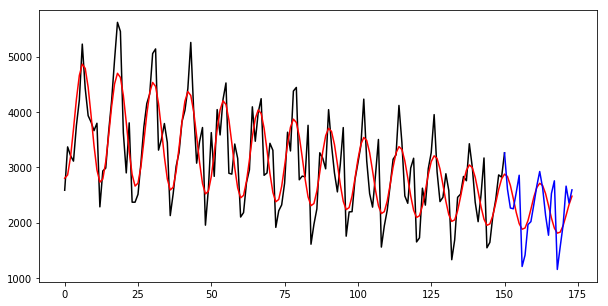

In [174]:
def func3(t, b0, b1,b2,b3, b4): 
    return (b0+b4*t) + (b1 *t+b3)*np.sin(2*np.pi/12*t +b2)
 
from scipy.optimize import curve_fit 
popt, pcov = curve_fit(func3, t.reshape(1,-1)[0], Z.reshape(1,-1)[0]) 
plt.figure(figsize = (10, 5)) 
plt.plot(t, Z, 'k') 
plt.plot(t0, np.sin(t0*2*np.pi/12 + popt[2])*(popt[1]*t0+popt[3])+(popt[0]+popt[4]*t0), 'r') 
plt.plot(t0[-24:], Fort[-24:], 'b') 
plt.show() 

In [175]:
def me(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = differences.mean()
    return mean_of_differences

In [179]:
pred = np.sin(t0*2*np.pi/12 + popt[2])*(popt[1]*t0+popt[3])+(popt[0]+popt[4]*t0)
pred_1 = pred[-24:]

In [180]:
me(pred_1[-24:],Fort[-24:])

339.41892863182164

In [181]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val

In [182]:
rmse(pred_1[-24:],Fort[-24:])

421.7002782527692

In [183]:
def mape(predictions, targets):
    differences = np.abs(predictions - targets)
    mean_of_differences = (differences/predictions)*100 
    mape_val = mean_of_differences.mean() 
    return mape_val

In [184]:
mape(pred_1[-24:],Fort[-24:])

15.95389529057474

In [185]:
def k1ns(predictions, targets):
    differences = predictions - targets                       
    differences_squared = differences ** 2   
    differences_sum = differences_squared.sum()
    differences1 = predictions**2
    differences1_sum = differences1.sum() 
    finish = differences_sum / differences1_sum
    k1ns_val = np.sqrt(finish) 
    return k1ns_val

In [186]:
k1ns(pred_1[-24:],Fort[-24:])

0.1825939684817298

In [187]:
def k2ns(predictions, targets):
    differences = predictions - targets                       
    differences_squared = differences ** 2   
    differences_sum = differences_squared.sum()
    differences1 = ((targets.mean())-predictions)**2
    differences1_sum = differences1.sum() 
    finish = differences_sum / differences1_sum
    k2ns_val = np.sqrt(finish) 
    return k2ns_val

In [188]:
k2ns(pred_1[-24:],Fort[-24:])

1.270545693245393